In [7]:
import math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import io
from scipy.stats import norm
import imp
import LabMethods
imp.reload(LabMethods)
import scipy

In [8]:
univWashCPM = pd.read_csv('uw.csv')
univWashAQ = pd.read_csv('uw_aq.csv')
univWashWeather = pd.read_csv('uw_weather.csv')
univWashCsI = pd.read_csv('uw_d3s.csv.crdownload')
univWashCO2 = pd.read_csv('uw_adc.csv')
pinewoodCPM = pd.read_csv('pinewood_os.csv')
pinewoodAQ = pd.read_csv('pinewood_os_aq.csv')
pinewoodWeather = pd.read_csv('pinewood_os_weather.csv')
pinewoodCsI = pd.read_csv('pinewood_os_d3s.csv.crdownload')
pinewoodCO2 = pd.read_csv('pinewood_os_adc.csv')
etchRoofCPM = pd.read_csv('etch_roof.csv')
etchRoofAQ = pd.read_csv('etch_roof_aq.csv')
etchRoofWeather = pd.read_csv('etch_roof_weather.csv')
etchRoofCsI = pd.read_csv('etch_roof_d3s.csv.crdownload')

In [9]:
def get_web_data(url):
    header = {
      "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
      "X-Requested-With": "XMLHttpRequest"
    }
    s = requests.get(url, headers=header).text
    data = pd.read_csv(io.StringIO(s))
    return data

In [10]:
url = "https://radwatch.berkeley.edu/test/tmp/dosenet/etch_roof_adc.csv?krfqbrqf"
etchRoofCO2 = get_web_data(url)
etchRoofCO2

,deviceTime_utc,deviceTime_local,deviceTime_unix,co2_ppm,noise,error_flag
0,2017-11-17 18:40:49+00:00,2017-11-17 10:40:49-08:00,1.510944e+09,544.68,2.99,NaN
1,2017-11-17 18:45:49+00:00,2017-11-17 10:45:49-08:00,1.510944e+09,580.67,2.91,NaN
2,2017-11-17 18:50:49+00:00,2017-11-17 10:50:49-08:00,1.510945e+09,572.51,2.98,NaN
3,2017-11-17 18:55:49+00:00,2017-11-17 10:55:49-08:00,1.510945e+09,563.72,3.04,NaN
4,2017-11-17 19:00:49+00:00,2017-11-17 11:00:49-08:00,1.510945e+09,563.10,3.04,NaN
...,...,...,...,...,...,...
220231,2021-04-23 23:10:39+0000,2021-04-23 16:10:39-0700,1.619219e+09,479.31,2.97,0.0
220232,2021-04-23 23:15:39+0000,2021-04-23 16:15:39-0700,1.619220e+09,478.51,2.93,0.0
220233,2021-04-23 23:20:39+0000,2021-04-23 16:20:39-0700,1.619220e+09,479.18,2.97,0.0
220234,2021-04-23 23:25:39+0000,2021-04-23 16:25:39-0700,1.619220e+09,479.29,2.98,0.0


In [11]:
etchRoofCPM = etchRoofCPM.drop(columns = ['error_flag'])
etchRoofWeather = etchRoofWeather.drop(columns = ['error_flag'])
etchRoofCO2 = etchRoofCO2.drop(columns = ['error_flag'])
etchRoofAQ = etchRoofAQ.drop(columns = ['error_flag'])
pinewoodCPM = pinewoodCPM.drop(columns = ['error_flag'])
pinewoodWeather = pinewoodWeather.drop(columns = ['error_flag'])
pinewoodCO2 = pinewoodCO2.drop(columns = ['error_flag'])
pinewoodAQ = pinewoodAQ.drop(columns = ['error_flag'])
univWashCPM = univWashCPM.drop(columns = ['error_flag'])
univWashWeather = univWashWeather.drop(columns = ['error_flag'])
univWashCO2 = univWashCO2.drop(columns = ['error_flag'])
univWashAQ = univWashAQ.drop(columns = ['error_flag'])

In [12]:
etchRoofCO2

,deviceTime_utc,deviceTime_local,deviceTime_unix,co2_ppm,noise
0,2017-11-17 18:40:49+00:00,2017-11-17 10:40:49-08:00,1.510944e+09,544.68,2.99
1,2017-11-17 18:45:49+00:00,2017-11-17 10:45:49-08:00,1.510944e+09,580.67,2.91
2,2017-11-17 18:50:49+00:00,2017-11-17 10:50:49-08:00,1.510945e+09,572.51,2.98
3,2017-11-17 18:55:49+00:00,2017-11-17 10:55:49-08:00,1.510945e+09,563.72,3.04
4,2017-11-17 19:00:49+00:00,2017-11-17 11:00:49-08:00,1.510945e+09,563.10,3.04
...,...,...,...,...,...
220231,2021-04-23 23:10:39+0000,2021-04-23 16:10:39-0700,1.619219e+09,479.31,2.97
220232,2021-04-23 23:15:39+0000,2021-04-23 16:15:39-0700,1.619220e+09,478.51,2.93
220233,2021-04-23 23:20:39+0000,2021-04-23 16:20:39-0700,1.619220e+09,479.18,2.97
220234,2021-04-23 23:25:39+0000,2021-04-23 16:25:39-0700,1.619220e+09,479.29,2.98


In [13]:
etchMonthRange1 = "2018-04-07 12:00:00-07:00"
etchMonthRange2 = "2018-05-07 17:00:00-07:00"

In [14]:
time_range = (etchRoofAQ['deviceTime_local']> etchMonthRange1)&(etchRoofAQ['deviceTime_local']< etchMonthRange2)
etchRoofAQ_cut = etchRoofAQ[time_range]
etchRoofAQ_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,PM1,PM25,PM10
38098,2018-04-07 19:01:11+00:00,2018-04-07 12:01:11-07:00,1.523128e+09,5.22,10.43,19.10
38099,2018-04-07 19:06:11+00:00,2018-04-07 12:06:11-07:00,1.523128e+09,5.38,10.69,19.79
38100,2018-04-07 19:11:11+00:00,2018-04-07 12:11:11-07:00,1.523128e+09,4.77,9.97,18.91
38101,2018-04-07 19:16:11+00:00,2018-04-07 12:16:11-07:00,1.523129e+09,5.36,10.69,21.72
38102,2018-04-07 19:21:11+00:00,2018-04-07 12:21:11-07:00,1.523129e+09,5.18,9.96,19.43
...,...,...,...,...,...,...
44150,2018-05-07 23:36:26+00:00,2018-05-07 16:36:26-07:00,1.525736e+09,2.92,4.50,5.93
44151,2018-05-07 23:41:25+00:00,2018-05-07 16:41:25-07:00,1.525736e+09,2.13,3.14,5.07
44152,2018-05-07 23:46:25+00:00,2018-05-07 16:46:25-07:00,1.525737e+09,1.81,2.09,3.59
44153,2018-05-07 23:51:20+00:00,2018-05-07 16:51:20-07:00,1.525737e+09,1.71,2.02,3.99


In [15]:
time_range = (etchRoofCO2['deviceTime_local']>etchMonthRange1)&(etchRoofCO2['deviceTime_local']<etchMonthRange2)
etchRoofCO2_cut = etchRoofCO2[time_range]
etchRoofCO2_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,co2_ppm,noise
36982,2018-04-07 19:00:42+00:00,2018-04-07 12:00:42-07:00,1.523128e+09,621.54,3.08
36983,2018-04-07 19:05:42+00:00,2018-04-07 12:05:42-07:00,1.523128e+09,623.14,3.06
36984,2018-04-07 19:10:42+00:00,2018-04-07 12:10:42-07:00,1.523128e+09,623.28,3.05
36985,2018-04-07 19:15:42+00:00,2018-04-07 12:15:42-07:00,1.523129e+09,614.61,3.07
36986,2018-04-07 19:20:42+00:00,2018-04-07 12:20:42-07:00,1.523129e+09,617.34,3.07
...,...,...,...,...,...
45039,2018-05-07 23:35:51+00:00,2018-05-07 16:35:51-07:00,1.525736e+09,569.82,3.26
45040,2018-05-07 23:40:51+00:00,2018-05-07 16:40:51-07:00,1.525736e+09,576.52,3.27
45041,2018-05-07 23:45:51+00:00,2018-05-07 16:45:51-07:00,1.525737e+09,578.80,3.29
45042,2018-05-07 23:50:51+00:00,2018-05-07 16:50:51-07:00,1.525737e+09,574.48,3.28


In [16]:
time_range = (etchRoofWeather['deviceTime_local']>etchMonthRange1)&(etchRoofWeather['deviceTime_local']<etchMonthRange2)
etchRoofWeather_cut = etchRoofWeather[time_range]
etchRoofWeather_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity
36761,2018-04-07 19:00:42+00:00,2018-04-07 12:00:42-07:00,1.523128e+09,17.92,1003.27,88.95
36762,2018-04-07 19:05:42+00:00,2018-04-07 12:05:42-07:00,1.523128e+09,17.92,1003.31,88.59
36763,2018-04-07 19:10:42+00:00,2018-04-07 12:10:42-07:00,1.523128e+09,17.93,1003.35,87.97
36764,2018-04-07 19:15:42+00:00,2018-04-07 12:15:42-07:00,1.523129e+09,17.96,1003.42,87.88
36765,2018-04-07 19:20:42+00:00,2018-04-07 12:20:42-07:00,1.523129e+09,17.95,1003.40,88.25
...,...,...,...,...,...,...
44823,2018-05-07 23:35:51+00:00,2018-05-07 16:35:51-07:00,1.525736e+09,21.17,1005.20,51.25
44824,2018-05-07 23:40:51+00:00,2018-05-07 16:40:51-07:00,1.525736e+09,21.20,1005.16,51.08
44825,2018-05-07 23:45:51+00:00,2018-05-07 16:45:51-07:00,1.525737e+09,21.20,1005.12,50.90
44826,2018-05-07 23:50:51+00:00,2018-05-07 16:50:51-07:00,1.525737e+09,21.22,1005.06,50.89


In [17]:
time_range1 = (etchRoofCPM['deviceTime_local']>etchMonthRange1)&(etchRoofCPM['deviceTime_local']<etchMonthRange2)
etchRoofCPM_cut = etchRoofCPM[time_range1]
etchRoofCPM_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError
200164,2018-04-07 19:00:43+00:00,2018-04-07 12:00:43-07:00,1.523128e+09,1.8,0.600000
200165,2018-04-07 19:05:43+00:00,2018-04-07 12:05:43-07:00,1.523128e+09,3.4,0.824621
200166,2018-04-07 19:10:43+00:00,2018-04-07 12:10:43-07:00,1.523128e+09,2.0,0.632456
200167,2018-04-07 19:15:43+00:00,2018-04-07 12:15:43-07:00,1.523129e+09,3.0,0.774597
200168,2018-04-07 19:20:43+00:00,2018-04-07 12:20:43-07:00,1.523129e+09,2.2,0.663325
...,...,...,...,...,...
208226,2018-05-07 23:35:55+00:00,2018-05-07 16:35:55-07:00,1.525736e+09,2.0,0.632456
208227,2018-05-07 23:40:55+00:00,2018-05-07 16:40:55-07:00,1.525736e+09,3.0,0.774597
208228,2018-05-07 23:45:55+00:00,2018-05-07 16:45:55-07:00,1.525737e+09,2.8,0.748331
208229,2018-05-07 23:50:55+00:00,2018-05-07 16:50:55-07:00,1.525737e+09,2.2,0.663325


In [18]:
rebin = 30
imp.reload(LabMethods)
etchRoofCPM_binned, etchRoofWeather_binned = LabMethods.bin_correlation_data(etchRoofCPM_cut, etchRoofWeather_cut, rebin)

Text(0.5, 1.0, 'Etcheverry roof temperature vs CPM')

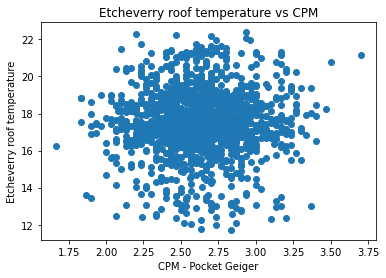

In [294]:
plt.scatter(etchRoofCPM_binned['cpm'], etchRoofWeather_binned['temperature'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("Etcheverry roof temperature")
plt.title("Etcheverry roof temperature vs CPM")

In [295]:
r_counts, p_counts = scipy.stats.pearsonr(etchRoofCPM_binned['cpm'].values, etchRoofWeather_binned['temperature'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.0009617962884867584
corr. coeff. = 0.03101284070327577, p-value = 0.25588754893543864


The correlation is weak with only about 3 percent of the random counts being correlated. With the p-value being relatively high, it indicates that there is strong evidence for the null hypothesis and that the results of counts being correlated happened by random. 

In [312]:
rebin = 30
imp.reload(LabMethods)
etchRoofCPM_binned, etchRoofAQ_binned = LabMethods.bin_correlation_data(etchRoofCPM_cut, etchRoofAQ_cut, rebin)

Text(0.5, 1.0, 'Etcheverry roof air quality vs CPM')

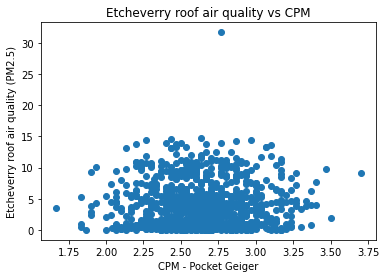

In [313]:
plt.scatter(etchRoofCPM_binned['cpm'], etchRoofAQ_binned['PM25'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("Etcheverry roof air quality (PM2.5)")
plt.title("Etcheverry roof air quality vs CPM")

In [314]:
r_counts, p_counts = scipy.stats.pearsonr(etchRoofCPM_binned['cpm'].values, etchRoofAQ_binned['PM25'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 4.324641801309034e-05
corr. coeff. = 0.006576200879922263, p-value = 0.834814303182189


The correlation is extremely weak with only about 0.6 percent of the random counts being correlated. With the p-value being very high, it indicates that there is strong evidence for the null hypothesis and that the results of counts being correlated happened by random. 

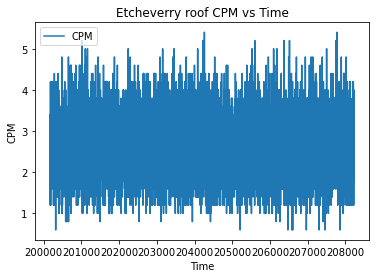

The mean of Etcheverry roof in cpm is  2.6255113425065137 +/- 1.6203429706412509
The standard deviation is  0.9218601071945358


In [306]:
plt.plot(etchRoofCPM_cut['cpm'], label = "CPM")
plt.ylabel('CPM')
plt.xlabel('Time')
plt.title('Etcheverry roof CPM vs Time')
plt.legend()
plt.show()
etchRoofCPM_mean = np.mean(etchRoofCPM_cut['cpm'])
etchRoofCPM_unc = np.sqrt(etchRoofCPM_mean)
etchRoofCPM_std_unc = etchRoofCPM_unc/ np.sqrt(2* len(etchRoofCPM_cut['cpm']))
etchRoofCPM_std = np.std(etchRoofCPM['cpm'])
print("The mean of Etcheverry roof in cpm is ", etchRoofCPM_mean, '+/-', etchRoofCPM_unc)
print("The standard deviation is ", etchRoofCPM_std)

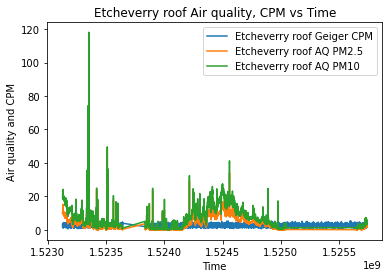

The mean of Etcheverry roof for PM25 air quality is  3.969233944196802 +/- 1.9922936390494255
The standard deviation is  4.187004672835374
The mean of Etcheverry roof for PM10 air quality is  6.864929833250782 +/- 2.6201011112647508
The standard deviation is  6.107348861799672


In [307]:
plt.plot(etchRoofCPM_cut['deviceTime_unix'], etchRoofCPM_cut['cpm'],label = "Etcheverry roof Geiger CPM")
plt.plot(etchRoofAQ_cut['deviceTime_unix'],etchRoofAQ_cut['PM25'],label = "Etcheverry roof AQ PM2.5")
plt.plot(etchRoofAQ_cut['deviceTime_unix'],etchRoofAQ_cut['PM10'],label = "Etcheverry roof AQ PM10")
plt.ylabel('Air quality and CPM')
plt.xlabel('Time')
plt.title("Etcheverry roof Air quality, CPM vs Time")
plt.legend()
plt.show()
etchRoofAQ_mean = np.mean(etchRoofAQ_cut['PM25'])
etchRoofAQ_unc = np.sqrt(etchRoofAQ_mean)
etchRoofAQ_std_unc = etchRoofAQ_unc/ np.sqrt(2* len(etchRoofAQ_cut['PM25']))
etchRoofAQ_std = np.std(etchRoofAQ_cut['PM25'])
print("The mean of Etcheverry roof for PM25 air quality is ", etchRoofAQ_mean, '+/-', etchRoofAQ_unc)
print("The standard deviation is ", etchRoofAQ_std)
etchRoofAQ10_mean = np.mean(etchRoofAQ_cut['PM10'])
etchRoofAQ10_unc = np.sqrt(etchRoofAQ10_mean)
etchRoofAQ10_std_unc = etchRoofAQ10_unc/ np.sqrt(2* len(etchRoofAQ_cut['PM10']))
etchRoofAQ10_std = np.std(etchRoofAQ_cut['PM10'])
print("The mean of Etcheverry roof for PM10 air quality is ", etchRoofAQ10_mean, '+/-', etchRoofAQ10_unc)
print("The standard deviation is ", etchRoofAQ10_std)

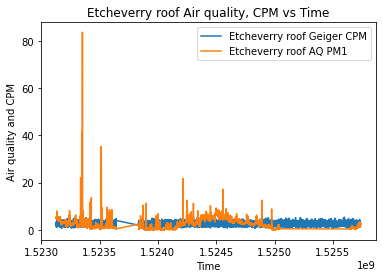

The mean of Etcheverry roof for PM1 air quality is  2.490759451873868 +/- 1.5782140069945736
The standard deviation is  2.3262430342798335


In [308]:
plt.plot(etchRoofCPM_cut['deviceTime_unix'], etchRoofCPM_cut['cpm'],label = "Etcheverry roof Geiger CPM")
plt.plot(etchRoofAQ_cut['deviceTime_unix'],etchRoofAQ_cut['PM1'],label = "Etcheverry roof AQ PM1")
plt.ylabel('Air quality and CPM')
plt.xlabel('Time')
plt.title("Etcheverry roof Air quality, CPM vs Time")
plt.legend()
plt.show()
etchRoofAQ1_mean = np.mean(etchRoofAQ_cut['PM1'])
etchRoofAQ1_unc = np.sqrt(etchRoofAQ1_mean)
etchRoofAQ1_std_unc = etchRoofAQ1_unc/ np.sqrt(2* len(etchRoofAQ_cut['PM1']))
etchRoofAQ1_std = np.std(etchRoofAQ_cut['PM1'])
print("The mean of Etcheverry roof for PM1 air quality is ", etchRoofAQ1_mean, '+/-', etchRoofAQ1_unc)
print("The standard deviation is ", etchRoofAQ1_std)

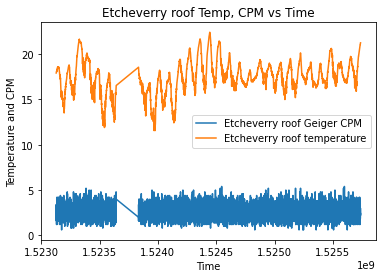

The mean of Etcheverry roof for temperature is  17.474751456551434 +/- 4.180281265244174
The standard deviation is  1.8316808032790637


In [309]:
plt.plot(etchRoofCPM_cut['deviceTime_unix'], etchRoofCPM_cut['cpm'],label = "Etcheverry roof Geiger CPM")
plt.plot(etchRoofWeather_cut['deviceTime_unix'],etchRoofWeather_cut['temperature'],label = "Etcheverry roof temperature")
plt.ylabel('Temperature and CPM')
plt.xlabel('Time')
plt.title("Etcheverry roof Temp, CPM vs Time")
plt.legend()
plt.show()
etchRoofWeatherTemp_mean = np.mean(etchRoofWeather_cut['temperature'])
etchRoofWeatherTemp_unc = np.sqrt(etchRoofWeatherTemp_mean)
etchRoofWeatherTemp_std_unc = etchRoofWeatherTemp_unc/ np.sqrt(2* len(etchRoofWeather_cut['temperature']))
etchRoofWeatherTemp_std = np.std(etchRoofWeather_cut['temperature'])
print("The mean of Etcheverry roof for temperature is ", etchRoofWeatherTemp_mean, '+/-', etchRoofWeatherTemp_unc)
print("The standard deviation is ", etchRoofWeatherTemp_std)

In [315]:
rebin = 30
imp.reload(LabMethods)
etchRoofCPM_binned, etchRoofWeather_binned = LabMethods.bin_correlation_data(etchRoofCPM_cut, etchRoofWeather_cut, rebin)

Text(0.5, 1.0, 'Etcheverry roof humidity vs CPM')

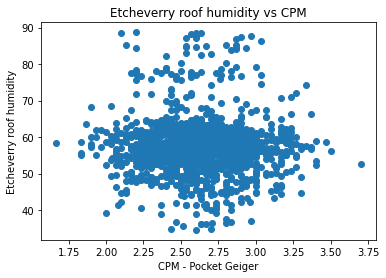

In [316]:
plt.scatter(etchRoofCPM_binned['cpm'], etchRoofWeather_binned['humidity'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("Etcheverry roof humidity")
plt.title("Etcheverry roof humidity vs CPM")

In [319]:
r_counts, p_counts = scipy.stats.pearsonr(etchRoofCPM_binned['cpm'].values, etchRoofWeather_binned['humidity'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.0009318844628810491
corr. coeff. = -0.030526782714217514, p-value = 0.2634176822846102


The correlation coefficient or r sqaured was off since it became negative but with the p-value being relatively high, it indicates that there is strong evidence for the null hypothesis and that the results of counts being correlated happened by random. 

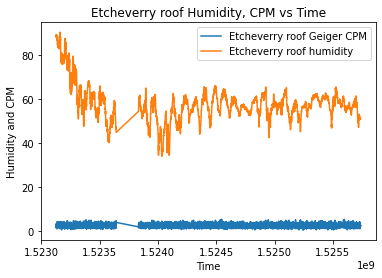

The mean of Etcheverry roof for humidity is  57.34204165117139 +/- 7.572452816041272
The standard deviation is  7.879854855371047


In [320]:
plt.plot(etchRoofCPM_cut['deviceTime_unix'], etchRoofCPM_cut['cpm'],label = "Etcheverry roof Geiger CPM")
plt.plot(etchRoofWeather_cut['deviceTime_unix'],etchRoofWeather_cut['humidity'],label = "Etcheverry roof humidity")
plt.ylabel('Humidity and CPM')
plt.xlabel('Time')
plt.title("Etcheverry roof Humidity, CPM vs Time")
plt.legend()
plt.show()
etchRoofWeatherHumid_mean = np.mean(etchRoofWeather_cut['humidity'])
etchRoofWeatherHumid_unc = np.sqrt(etchRoofWeatherHumid_mean)
etchRoofWeatherHumid_std_unc = etchRoofWeatherHumid_unc/ np.sqrt(2* len(etchRoofWeather_cut['humidity']))
etchRoofWeatherHumid_std = np.std(etchRoofWeather_cut['humidity'])
print("The mean of Etcheverry roof for humidity is ", etchRoofWeatherHumid_mean, '+/-', etchRoofWeatherHumid_unc)
print("The standard deviation is ", etchRoofWeatherHumid_std)

In [321]:
rebin = 30
imp.reload(LabMethods)
etchRoofCPM_binned, etchRoofWeather_binned = LabMethods.bin_correlation_data(etchRoofCPM_cut, etchRoofWeather_cut, rebin)

Text(0.5, 1.0, 'Etcheverry roof pressure vs CPM')

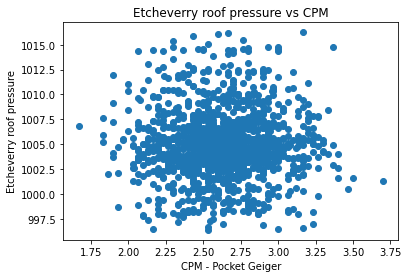

In [322]:
plt.scatter(etchRoofCPM_binned['cpm'], etchRoofWeather_binned['pressure'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("Etcheverry roof pressure")
plt.title("Etcheverry roof pressure vs CPM")

In [323]:
r_counts, p_counts = scipy.stats.pearsonr(etchRoofCPM_binned['cpm'].values, etchRoofWeather_binned['pressure'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 4.8624939411342585e-06
corr. coeff. = -0.0022051063332942152, p-value = 0.9356285146143719


The correlation coefficient became a negative with the p-value being very high of 94 percent it indicates that there is strong evidence for the null hypothesis and that the results of counts being correlated happened by random.

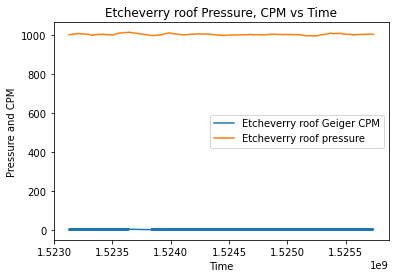

The mean of Etcheverry roof for pressure is  1004.9493839097537 +/- 31.700936640890497
The standard deviation is  3.427980322813292


In [324]:
plt.plot(etchRoofCPM_cut['deviceTime_unix'], etchRoofCPM_cut['cpm'],label = "Etcheverry roof Geiger CPM")
plt.plot(etchRoofWeather_cut['deviceTime_unix'],etchRoofWeather_cut['pressure'],label = "Etcheverry roof pressure")
plt.ylabel('Pressure and CPM')
plt.xlabel('Time')
plt.title("Etcheverry roof Pressure, CPM vs Time")
plt.legend()
plt.show()
etchRoofWeatherPressure_mean = np.mean(etchRoofWeather_cut['pressure'])
etchRoofWeatherPressure_unc = np.sqrt(etchRoofWeatherPressure_mean)
etchRoofWeatherPressure_std_unc = etchRoofWeatherPressure_unc/ np.sqrt(2* len(etchRoofWeather_cut['pressure']))
etchRoofWeatherPressure_std = np.std(etchRoofWeather_cut['pressure'])
print("The mean of Etcheverry roof for pressure is ", etchRoofWeatherPressure_mean, '+/-', etchRoofWeatherPressure_unc)
print("The standard deviation is ", etchRoofWeatherPressure_std)

In [336]:
etchRoofCO2

,deviceTime_utc,deviceTime_local,deviceTime_unix,co2_ppm,noise
0,2017-11-17 18:40:49+00:00,2017-11-17 10:40:49-08:00,1.510944e+09,544.68,2.99
1,2017-11-17 18:45:49+00:00,2017-11-17 10:45:49-08:00,1.510944e+09,580.67,2.91
2,2017-11-17 18:50:49+00:00,2017-11-17 10:50:49-08:00,1.510945e+09,572.51,2.98
3,2017-11-17 18:55:49+00:00,2017-11-17 10:55:49-08:00,1.510945e+09,563.72,3.04
4,2017-11-17 19:00:49+00:00,2017-11-17 11:00:49-08:00,1.510945e+09,563.10,3.04
...,...,...,...,...,...
45126,2018-05-08 06:50:51+00:00,2018-05-07 23:50:51-07:00,1.525762e+09,587.20,3.11
45127,2018-05-08 06:55:51+00:00,2018-05-07 23:55:51-07:00,1.525763e+09,583.66,3.12
45128,2018-05-08 07:00:51+00:00,2018-05-08 00:00:51-07:00,1.525763e+09,578.33,3.13
45129,2018-05-08 07:05:51+00:00,2018-05-08 00:05:51-07:00,1.525763e+09,583.44,3.14


In [340]:
rebin = 30
imp.reload(LabMethods)
etchRoofCPM_binned, etchRoofCO2_binned = LabMethods.bin_correlation_data(etchRoofCPM_cut, etchRoofCO2_cut, rebin)

Text(0.5, 1.0, 'Etcheverry roof CO2 vs CPM')

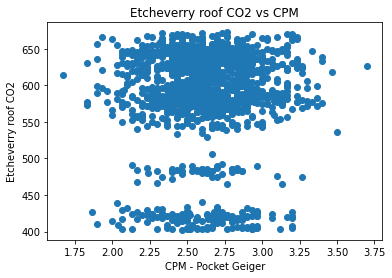

In [341]:
plt.scatter(etchRoofCPM_binned['cpm'], etchRoofCO2_binned['co2_ppm'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("Etcheverry roof CO2")
plt.title("Etcheverry roof CO2 vs CPM")

In [342]:
r_counts, p_counts = scipy.stats.pearsonr(etchRoofCPM_binned['cpm'].values, etchRoofCO2_binned['co2_ppm'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.00023481240191631925
corr. coeff. = 0.015323589720307682, p-value = 0.5746050877144475


The correlation is very weak with 1.5 percent of random counts being correlated. With the p-value being relatively high of 57 percent it indicates that there is strong evidence for the null hypothesis and that the results of counts being correlated happened by random.

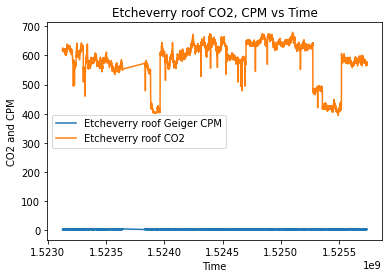

The mean of Etcheverry roof for CO2 is  584.890549491442 +/- 24.184510528258414
The standard deviation is  68.08703713416362


In [343]:
plt.plot(etchRoofCPM_cut['deviceTime_unix'], etchRoofCPM_cut['cpm'],label = "Etcheverry roof Geiger CPM")
plt.plot(etchRoofCO2_cut['deviceTime_unix'],etchRoofCO2_cut['co2_ppm'],label = "Etcheverry roof CO2")
plt.ylabel('CO2 and CPM')
plt.xlabel('Time')
plt.title("Etcheverry roof CO2, CPM vs Time")
plt.legend()
plt.show()
etchRoofCO2_mean = np.mean(etchRoofCO2_cut['co2_ppm'])
etchRoofCO2_unc = np.sqrt(etchRoofCO2_mean)
etchRoofCO2_std_unc = etchRoofCO2_unc/ np.sqrt(2* len(etchRoofCO2_cut['co2_ppm']))
etchRoofCO2_std = np.std(etchRoofCO2_cut['co2_ppm'])
print("The mean of Etcheverry roof for CO2 is ", etchRoofCO2_mean, '+/-', etchRoofCO2_unc)
print("The standard deviation is ", etchRoofCO2_std)

In [19]:
pinewoodMonth1 = '2019-02-03 12:00:00:-07:00'
pinewoodMonth2 = '2019-03-03 17:00:00:-07:00'

In [20]:
time_range = (pinewoodCPM['deviceTime_local']> pinewoodMonth1)&(pinewoodCPM['deviceTime_local']< pinewoodMonth2)
pinewoodCPM_cut = pinewoodCPM[time_range]
pinewoodCPM_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError
100510,2019-02-03 23:06:01+00:00,2019-02-03 15:06:01-08:00,1549235161,1.6,0.565685
100511,2019-02-03 23:11:01+00:00,2019-02-03 15:11:01-08:00,1549235461,1.6,0.565685
100512,2019-02-03 23:16:01+00:00,2019-02-03 15:16:01-08:00,1549235761,2.4,0.692820
100513,2019-02-03 23:21:02+00:00,2019-02-03 15:21:02-08:00,1549236062,2.0,0.632456
100514,2019-02-03 23:26:01+00:00,2019-02-03 15:26:01-08:00,1549236361,1.4,0.529150
...,...,...,...,...,...
108075,2019-03-04 00:35:44+00:00,2019-03-03 16:35:44-08:00,1551659744,1.6,0.565685
108076,2019-03-04 00:40:44+00:00,2019-03-03 16:40:44-08:00,1551660044,3.8,0.871780
108077,2019-03-04 00:45:44+00:00,2019-03-03 16:45:44-08:00,1551660344,1.4,0.529150
108078,2019-03-04 00:50:44+00:00,2019-03-03 16:50:44-08:00,1551660644,2.6,0.721110


In [21]:
time_range = (pinewoodWeather['deviceTime_local']>pinewoodMonth1)&(pinewoodWeather['deviceTime_local']<pinewoodMonth2)
pinewoodWeather_cut = pinewoodWeather[time_range]
pinewoodWeather_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity
75174,2019-02-03 23:05:56+00:00,2019-02-03 15:05:56-08:00,1549235156,15.39,1001.04,68.48
75175,2019-02-03 23:10:57+00:00,2019-02-03 15:10:57-08:00,1549235457,15.47,1001.12,68.63
75176,2019-02-03 23:15:56+00:00,2019-02-03 15:15:56-08:00,1549235756,15.85,1001.19,66.59
75177,2019-02-03 23:20:56+00:00,2019-02-03 15:20:56-08:00,1549236056,14.68,1001.28,71.16
75178,2019-02-03 23:25:56+00:00,2019-02-03 15:25:56-08:00,1549236356,14.50,1001.33,70.43
...,...,...,...,...,...,...
82840,2019-03-04 00:35:44+00:00,2019-03-03 16:35:44-08:00,1551659744,14.05,1012.50,79.18
82841,2019-03-04 00:40:44+00:00,2019-03-03 16:40:44-08:00,1551660044,14.26,1012.49,78.11
82842,2019-03-04 00:45:44+00:00,2019-03-03 16:45:44-08:00,1551660344,14.47,1012.44,76.74
82843,2019-03-04 00:50:44+00:00,2019-03-03 16:50:44-08:00,1551660644,14.41,1012.46,76.02


In [22]:
time_range = (pinewoodAQ['deviceTime_local']> pinewoodMonth1)&(pinewoodAQ['deviceTime_local']< pinewoodMonth2)
pinewoodAQ_cut = pinewoodAQ[time_range]
pinewoodAQ_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,PM1,PM25,PM10
83429,2019-02-03 23:06:24+00:00,2019-02-03 15:06:24-08:00,1549235184,0.0,0.0,0.0
83430,2019-02-03 23:11:25+00:00,2019-02-03 15:11:25-08:00,1549235485,0.0,0.0,0.0
83431,2019-02-03 23:16:25+00:00,2019-02-03 15:16:25-08:00,1549235785,0.0,0.0,0.0
83432,2019-02-03 23:21:25+00:00,2019-02-03 15:21:25-08:00,1549236085,0.0,0.0,0.0
83433,2019-02-03 23:26:25+00:00,2019-02-03 15:26:25-08:00,1549236385,0.0,0.0,0.0
...,...,...,...,...,...,...
90875,2019-03-04 00:36:12+00:00,2019-03-03 16:36:12-08:00,1551659772,0.0,0.0,0.0
90876,2019-03-04 00:41:12+00:00,2019-03-03 16:41:12-08:00,1551660072,0.0,0.0,0.0
90877,2019-03-04 00:46:12+00:00,2019-03-03 16:46:12-08:00,1551660372,0.0,0.0,0.0
90878,2019-03-04 00:51:12+00:00,2019-03-03 16:51:12-08:00,1551660672,0.0,0.0,0.0


In [23]:
time_range = (pinewoodCO2['deviceTime_local']>pinewoodMonth1)&(pinewoodCO2['deviceTime_local']< pinewoodMonth2)
pinewoodCO2_cut = pinewoodCO2[time_range]
pinewoodCO2_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,co2_ppm,noise
92720,2019-02-03 23:05:58+00:00,2019-02-03 15:05:58-08:00,1549235158,470.86,6.14
92721,2019-02-03 23:10:58+00:00,2019-02-03 15:10:58-08:00,1549235458,445.27,6.07
92722,2019-02-03 23:15:58+00:00,2019-02-03 15:15:58-08:00,1549235758,462.63,6.17
92723,2019-02-03 23:20:58+00:00,2019-02-03 15:20:58-08:00,1549236058,434.96,6.09
92724,2019-02-03 23:25:58+00:00,2019-02-03 15:25:58-08:00,1549236358,422.70,6.09
...,...,...,...,...,...
100354,2019-03-04 00:35:44+00:00,2019-03-03 16:35:44-08:00,1551659744,419.16,6.07
100355,2019-03-04 00:40:44+00:00,2019-03-03 16:40:44-08:00,1551660044,421.12,6.09
100356,2019-03-04 00:45:44+00:00,2019-03-03 16:45:44-08:00,1551660344,422.08,6.10
100357,2019-03-04 00:50:44+00:00,2019-03-03 16:50:44-08:00,1551660644,422.52,6.09


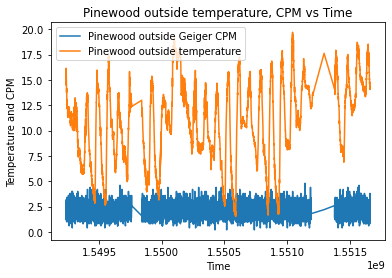

The mean of Pinewood outside for temperature is  10.834299309086152 +/- 3.2915496820018
The standard deviation is  3.8709258456423687


In [356]:
plt.plot(pinewoodCPM_cut['deviceTime_unix'], pinewoodCPM_cut['cpm'],label = "Pinewood outside Geiger CPM")
plt.plot(pinewoodWeather_cut['deviceTime_unix'],pinewoodWeather_cut['temperature'],label = "Pinewood outside temperature")
plt.ylabel('Temperature and CPM')
plt.xlabel('Time')
plt.title("Pinewood outside temperature, CPM vs Time")
plt.legend()
plt.show()
pinewoodWeatherTemp_mean = np.mean(pinewoodWeather_cut['temperature'])
pinewoodWeatherTemp_unc = np.sqrt(pinewoodWeatherTemp_mean)
pinewoodWeatherTemp_std_unc = pinewoodWeatherTemp_unc/ np.sqrt(2* len(pinewoodWeather_cut['temperature']))
pinewoodWeatherTemp_std = np.std(pinewoodWeather_cut['temperature'])
print("The mean of Pinewood outside for temperature is ", pinewoodWeatherTemp_mean, '+/-', pinewoodWeatherTemp_unc)
print("The standard deviation is ", pinewoodWeatherTemp_std)

In [357]:
rebin = 30
imp.reload(LabMethods)
pinewoodCPM_binned, pinewoodWeather_binned = LabMethods.bin_correlation_data(pinewoodCPM_cut, pinewoodWeather_cut, rebin)

Text(0.5, 1.0, 'Pinewood humidity vs CPM')

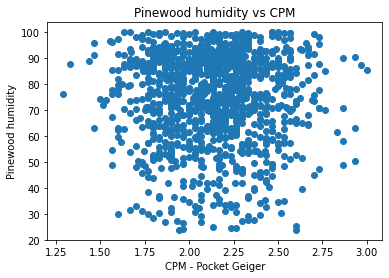

In [358]:
plt.scatter(pinewoodCPM_binned['cpm'], pinewoodWeather_binned['humidity'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("Pinewood humidity")
plt.title("Pinewood humidity vs CPM")

In [359]:
r_counts, p_counts = scipy.stats.pearsonr(pinewoodCPM_binned['cpm'].values, pinewoodWeather_binned['humidity'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.0001562941548539246
corr. coeff. = -0.012501766069396939, p-value = 0.665539363450143


The correlation coefficient became a negative with the p-value being high of 67 percent it indicates that there is strong evidence for the null hypothesis and that the results of counts being correlated happened by random.

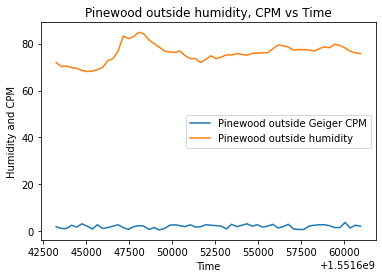

The mean of Pinewood outside for humidity is  75.89847457627118 +/- 8.71197305874342
The standard deviation is  3.9358860969288356


In [135]:
plt.plot(pinewoodCPM_cut['deviceTime_unix'], pinewoodCPM_cut['cpm'],label = "Pinewood outside Geiger CPM")
plt.plot(pinewoodWeather_cut['deviceTime_unix'],pinewoodWeather_cut['humidity'],label = "Pinewood outside humidity")
plt.ylabel('Humidity and CPM')
plt.xlabel('Time')
plt.title("Pinewood outside humidity, CPM vs Time")
plt.legend()
plt.show()
pinewoodWeatherHumid_mean = np.mean(pinewoodWeather_cut['humidity'])
pinewoodWeatherHumid_unc = np.sqrt(pinewoodWeatherHumid_mean)
pinewoodWeatherHumid_std_unc = pinewoodWeatherHumid_unc/ np.sqrt(2* len(pinewoodWeather_cut['humidity']))
pinewoodWeatherHumid_std = np.std(pinewoodWeather_cut['humidity'])
print("The mean of Pinewood outside for humidity is ", pinewoodWeatherHumid_mean, '+/-', pinewoodWeatherHumid_unc)
print("The standard deviation is ", pinewoodWeatherHumid_std)

In [24]:
rebin = 30
imp.reload(LabMethods)
pinewoodCPM_binned, pinewoodWeather_binned = LabMethods.bin_correlation_data(pinewoodCPM_cut, pinewoodWeather_cut, rebin)

Text(0.5, 1.0, 'Pinewood pressure vs CPM')

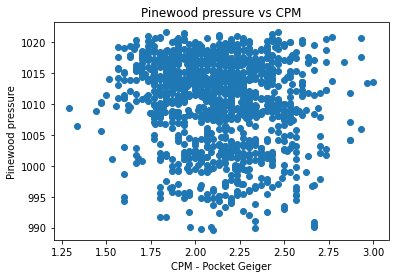

In [25]:
plt.scatter(pinewoodCPM_binned['cpm'], pinewoodWeather_binned['pressure'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("Pinewood pressure")
plt.title("Pinewood pressure vs CPM")

In [26]:
r_counts, p_counts = scipy.stats.pearsonr(pinewoodCPM_binned['cpm'].values, pinewoodWeather_binned['pressure'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.012950583538339874
corr. coeff. = -0.11380063065879677, p-value = 7.893802499768315e-05


The correlation coefficient became a negative with the p-value being extremely high of 67 indicating that there is strong evidence for the null hypothesis and that the results of counts being correlated happened by random.

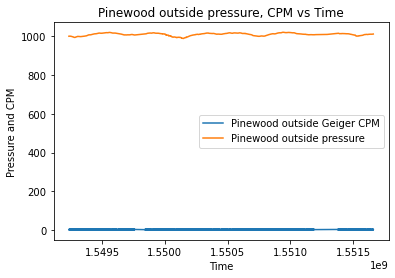

The mean of Pinewood outside for pressure is  1010.437038195802 +/- 31.787372307188306
The standard deviation is  7.016369081026876


In [27]:
plt.plot(pinewoodCPM_cut['deviceTime_unix'], pinewoodCPM_cut['cpm'],label = "Pinewood outside Geiger CPM")
plt.plot(pinewoodWeather_cut['deviceTime_unix'],pinewoodWeather_cut['pressure'],label = "Pinewood outside pressure")
plt.ylabel('Pressure and CPM')
plt.xlabel('Time')
plt.title("Pinewood outside pressure, CPM vs Time")
plt.legend()
plt.show()
pinewoodWeatherPressure_mean = np.mean(pinewoodWeather_cut['pressure'])
pinewoodWeatherPressure_unc = np.sqrt(pinewoodWeatherPressure_mean)
pinewoodWeatherPressure_std_unc = pinewoodWeatherPressure_unc/ np.sqrt(2* len(pinewoodWeather_cut['pressure']))
pinewoodWeatherPressure_std = np.std(pinewoodWeather_cut['pressure'])
print("The mean of Pinewood outside for pressure is ", pinewoodWeatherPressure_mean, '+/-', pinewoodWeatherPressure_unc)
print("The standard deviation is ", pinewoodWeatherPressure_std)

In [30]:
rebin = 30
imp.reload(LabMethods)
pinewoodCPM_binned, pinewoodCO2_binned = LabMethods.bin_correlation_data(pinewoodCPM_cut, pinewoodCO2_cut, rebin)

Text(0.5, 1.0, 'Pinewood CO2 vs CPM')

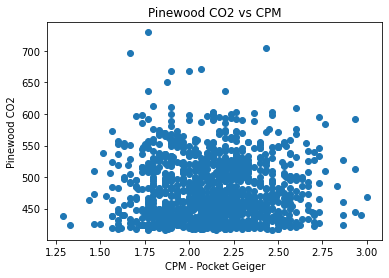

In [31]:
plt.scatter(pinewoodCPM_binned['cpm'], pinewoodCO2_binned['co2_ppm'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("Pinewood CO2")
plt.title("Pinewood CO2 vs CPM")

In [32]:
r_counts, p_counts = scipy.stats.pearsonr(pinewoodCPM_binned['cpm'].values, pinewoodCO2_binned['co2_ppm'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.00036308617896537603
corr. coeff. = -0.019054820360354385, p-value = 0.5097834653098348


The correlation coefficient became a negative with the p-value being high of 51% indicating that there is strong evidence for the null hypothesis and that the results of counts being correlated happened by random.

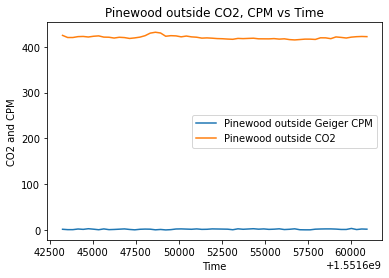

The mean of Pinewood outside for CO2 is  420.3594915254238 +/- 20.502670351088994
The standard deviation is  3.4154164069669477


In [137]:
plt.plot(pinewoodCPM_cut['deviceTime_unix'], pinewoodCPM_cut['cpm'],label = "Pinewood outside Geiger CPM")
plt.plot(pinewoodCO2_cut['deviceTime_unix'],pinewoodCO2_cut['co2_ppm'],label = "Pinewood outside CO2")
plt.ylabel('CO2 and CPM')
plt.xlabel('Time')
plt.title("Pinewood outside CO2, CPM vs Time")
plt.legend()
plt.show()
pinewoodCO2_mean = np.mean(pinewoodCO2_cut['co2_ppm'])
pinewoodCO2_unc = np.sqrt(pinewoodCO2_mean)
pinewoodCO2_std_unc = pinewoodCO2_unc/ np.sqrt(2* len(pinewoodCO2_cut['co2_ppm']))
pinewoodCO2_std = np.std(pinewoodCO2_cut['co2_ppm'])
print("The mean of Pinewood outside for CO2 is ", pinewoodCO2_mean, '+/-', pinewoodCO2_unc)
print("The standard deviation is ", pinewoodCO2_std)

In [83]:
pinewoodAQ

,deviceTime_utc,deviceTime_local,deviceTime_unix,PM1,PM25,PM10,error_flag
0,2018-02-01 21:22:13+00:00,2018-02-01 13:22:13-08:00,1517520133,0.0,0.0,0.0,NaN
1,2018-02-01 21:27:13+00:00,2018-02-01 13:27:13-08:00,1517520433,0.0,0.0,0.0,NaN
2,2018-02-01 21:32:13+00:00,2018-02-01 13:32:13-08:00,1517520733,0.0,0.0,0.0,NaN
3,2018-02-01 21:37:13+00:00,2018-02-01 13:37:13-08:00,1517521033,0.0,0.0,0.0,NaN
4,2018-02-01 21:42:13+00:00,2018-02-01 13:42:13-08:00,1517521333,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
101507,2019-04-15 06:36:10+00:00,2019-04-14 23:36:10-07:00,1555310170,0.0,0.0,0.0,NaN
101508,2019-04-15 06:41:10+00:00,2019-04-14 23:41:10-07:00,1555310470,0.0,0.0,0.0,NaN
101509,2019-04-15 06:46:10+00:00,2019-04-14 23:46:10-07:00,1555310770,0.0,0.0,0.0,NaN
101510,2019-04-15 06:51:10+00:00,2019-04-14 23:51:10-07:00,1555311070,0.0,0.0,0.0,NaN


In [34]:
rebin = 30
imp.reload(LabMethods)
pinewoodCPM_binned, pinewoodAQ_binned = LabMethods.bin_correlation_data(pinewoodCPM_cut, pinewoodAQ_cut, rebin)

Text(0.5, 1.0, 'Pinewood PM2.5 vs CPM')

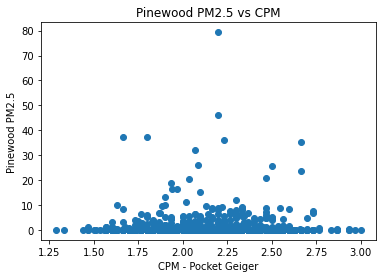

In [35]:
plt.scatter(pinewoodCPM_binned['cpm'], pinewoodAQ_binned['PM25'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("Pinewood PM2.5")
plt.title("Pinewood PM2.5 vs CPM")

In [36]:
r_counts, p_counts = scipy.stats.pearsonr(pinewoodCPM_binned['cpm'].values, pinewoodAQ_binned['PM25'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.00035803783703567185
corr. coeff. = 0.018921887776743414, p-value = 0.5130936704998821


The correlation is weak with only about 1.9 percent of the random counts being correlated. With the p-value being very high, it indicates that there is strong evidence for the null hypothesis and that the results of counts being correlated happened by random.

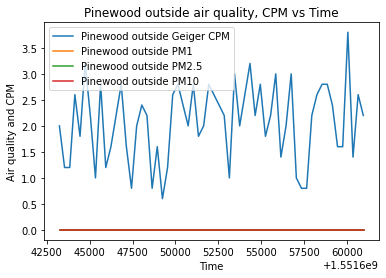

The mean of Pinewood outside for air quality for PM2.5, PM10, and PM1 is  0.0 +/- 0.0
The standard deviation is  0.0


In [140]:
plt.plot(pinewoodCPM_cut['deviceTime_unix'], pinewoodCPM_cut['cpm'],label = "Pinewood outside Geiger CPM")
plt.plot(pinewoodAQ_cut['deviceTime_unix'],pinewoodAQ_cut['PM1'],label = "Pinewood outside PM1")
plt.plot(pinewoodAQ_cut['deviceTime_unix'],pinewoodAQ_cut['PM25'],label = "Pinewood outside PM2.5")
plt.plot(pinewoodAQ_cut['deviceTime_unix'],pinewoodAQ_cut['PM10'],label = "Pinewood outside PM10")
plt.ylabel('Air quality and CPM')
plt.xlabel('Time')
plt.title("Pinewood outside air quality, CPM vs Time")
plt.legend()
plt.show()
pinewoodAQ25_mean = np.mean(pinewoodAQ_cut['PM25'])
pinewoodAQ25_unc = np.sqrt(pinewoodAQ25_mean)
pinewoodAQ25_std_unc = pinewoodAQ25_unc/ np.sqrt(2* len(pinewoodAQ_cut['PM25']))
pinewoodAQ25_std = np.std(pinewoodAQ_cut['PM25'])
print("The mean of Pinewood outside for air quality for PM2.5, PM10, and PM1 is ", pinewoodAQ25_mean, '+/-', pinewoodAQ25_unc)
print("The standard deviation is ", pinewoodAQ25_std)

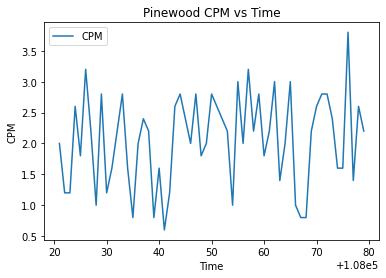

The mean of Pinewood outside for radiation in cpm is  2.061016949152542 +/- 1.435624236752968
The standard deviation is  0.7330033295072118


In [133]:
plt.plot(pinewoodCPM_cut['cpm'], label = "CPM")
plt.ylabel('CPM')
plt.xlabel('Time')
plt.title('Pinewood CPM vs Time')
plt.legend()
plt.show()
pinewoodCPM_mean = np.mean(pinewoodCPM_cut['cpm'])
pinewoodCPM_unc = np.sqrt(pinewoodCPM_mean)
pinewoodCPM_std_unc = pinewoodCPM_unc/ np.sqrt(2* len(pinewoodCPM_cut['cpm']))
pinewoodCPM_std = np.std(pinewoodCPM_cut['cpm'])
print("The mean of Pinewood outside for radiation in cpm is ", pinewoodCPM_mean, '+/-', pinewoodCPM_unc)
print("The standard deviation is ", pinewoodCPM_std)

In [39]:
timeRange1 = '2019-06-01 12:00:00:-07:00'
timeRange2 = '2019-07-01 17:00:00:-07:00'

In [92]:
univWashCPM

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,error_flag
0,2019-05-31 21:45:13+00:00,2019-05-31 14:45:13-07:00,1.559339e+09,2.6,0.721110,NaN
1,2019-05-31 21:50:13+00:00,2019-05-31 14:50:13-07:00,1.559339e+09,2.2,0.663325,NaN
2,2019-05-31 21:55:13+00:00,2019-05-31 14:55:13-07:00,1.559340e+09,3.2,0.800000,NaN
3,2019-05-31 22:00:13+00:00,2019-05-31 15:00:13-07:00,1.559340e+09,2.8,0.748331,NaN
4,2019-05-31 22:05:13+00:00,2019-05-31 15:05:13-07:00,1.559340e+09,0.8,0.400000,NaN
...,...,...,...,...,...,...
190729,2021-04-23 22:55:55+0000,2021-04-23 15:55:55-0700,1.619219e+09,2.4,0.692820,0.0
190730,2021-04-23 23:00:55+0000,2021-04-23 16:00:55-0700,1.619219e+09,2.6,0.721110,0.0
190731,2021-04-23 23:05:55+0000,2021-04-23 16:05:55-0700,1.619219e+09,3.2,0.800000,0.0
190732,2021-04-23 23:10:55+0000,2021-04-23 16:10:55-0700,1.619219e+09,1.2,0.489898,0.0


In [41]:
time_range = (univWashCPM['deviceTime_local']>timeRange1)&(univWashCPM['deviceTime_local']<timeRange2)
univWashCPM_cut = univWashCPM[time_range]
univWashCPM_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError
255,2019-06-01 19:00:13+00:00,2019-06-01 12:00:13-07:00,1.559416e+09,1.6,0.565685
256,2019-06-01 19:05:13+00:00,2019-06-01 12:05:13-07:00,1.559416e+09,3.2,0.800000
257,2019-06-01 19:10:13+00:00,2019-06-01 12:10:13-07:00,1.559416e+09,2.6,0.721110
258,2019-06-01 19:15:13+00:00,2019-06-01 12:15:13-07:00,1.559417e+09,2.2,0.663325
259,2019-06-01 19:20:13+00:00,2019-06-01 12:20:13-07:00,1.559417e+09,2.2,0.663325
...,...,...,...,...,...
8003,2019-07-01 23:35:44+00:00,2019-07-01 16:35:44-07:00,1.562024e+09,0.0,0.000000
8004,2019-07-01 23:40:44+00:00,2019-07-01 16:40:44-07:00,1.562024e+09,0.0,0.000000
8005,2019-07-01 23:45:44+00:00,2019-07-01 16:45:44-07:00,1.562025e+09,0.0,0.000000
8006,2019-07-01 23:50:44+00:00,2019-07-01 16:50:44-07:00,1.562025e+09,0.0,0.000000


In [96]:
univWashAQ

,deviceTime_utc,deviceTime_local,deviceTime_unix,PM1,PM25,PM10,error_flag
0,2019-05-31 21:45:41+00:00,2019-05-31 14:45:41-07:00,1.559339e+09,1.42,3.42,4.61,NaN
1,2019-05-31 21:50:41+00:00,2019-05-31 14:50:41-07:00,1.559339e+09,1.37,3.41,4.68,NaN
2,2019-05-31 21:55:41+00:00,2019-05-31 14:55:41-07:00,1.559340e+09,1.16,3.16,4.40,NaN
3,2019-05-31 22:00:41+00:00,2019-05-31 15:00:41-07:00,1.559340e+09,1.82,3.82,4.79,NaN
4,2019-05-31 22:05:41+00:00,2019-05-31 15:05:41-07:00,1.559340e+09,1.22,3.22,4.78,NaN
...,...,...,...,...,...,...,...
169934,2021-03-30 14:41:09+0000,2021-03-30 07:41:09-0700,1.617115e+09,0.00,0.00,0.00,0.0
169935,2021-03-30 14:46:09+0000,2021-03-30 07:46:09-0700,1.617116e+09,0.00,0.00,0.00,0.0
169936,2021-03-30 14:51:09+0000,2021-03-30 07:51:09-0700,1.617116e+09,0.00,0.00,0.00,0.0
169937,2021-03-30 14:56:09+0000,2021-03-30 07:56:09-0700,1.617116e+09,0.00,0.00,0.00,0.0


In [42]:
time_range = (univWashAQ['deviceTime_local']>timeRange1)&(univWashAQ['deviceTime_local']<timeRange2)
univWashAQ_cut = univWashAQ[time_range]
univWashAQ_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,PM1,PM25,PM10
255,2019-06-01 19:00:41+00:00,2019-06-01 12:00:41-07:00,1.559416e+09,2.29,4.55,5.33
256,2019-06-01 19:05:41+00:00,2019-06-01 12:05:41-07:00,1.559416e+09,1.94,3.94,4.43
257,2019-06-01 19:10:41+00:00,2019-06-01 12:10:41-07:00,1.559416e+09,1.83,3.83,4.87
258,2019-06-01 19:15:41+00:00,2019-06-01 12:15:41-07:00,1.559417e+09,2.27,4.00,5.00
259,2019-06-01 19:20:41+00:00,2019-06-01 12:20:41-07:00,1.559417e+09,1.91,3.90,5.00
...,...,...,...,...,...,...
6105,2019-07-01 23:36:10+00:00,2019-07-01 16:36:10-07:00,1.562024e+09,0.00,0.87,0.90
6106,2019-07-01 23:41:10+00:00,2019-07-01 16:41:10-07:00,1.562024e+09,0.00,0.89,0.92
6107,2019-07-01 23:46:10+00:00,2019-07-01 16:46:10-07:00,1.562025e+09,0.00,0.88,1.14
6108,2019-07-01 23:51:10+00:00,2019-07-01 16:51:10-07:00,1.562025e+09,0.00,0.31,0.31


In [98]:
univWashWeather

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity,error_flag
0,2019-05-31 21:45:12+00:00,2019-05-31 14:45:12-07:00,1.559339e+09,24.01,1015.78,52.91,NaN
1,2019-05-31 21:50:12+00:00,2019-05-31 14:50:12-07:00,1.559339e+09,24.18,1015.76,52.34,NaN
2,2019-05-31 21:55:12+00:00,2019-05-31 14:55:12-07:00,1.559340e+09,24.29,1015.70,51.94,NaN
3,2019-05-31 22:00:12+00:00,2019-05-31 15:00:12-07:00,1.559340e+09,24.38,1015.63,51.58,NaN
4,2019-05-31 22:05:12+00:00,2019-05-31 15:05:12-07:00,1.559340e+09,24.46,1015.59,51.29,NaN
...,...,...,...,...,...,...,...
184826,2021-04-23 22:55:56+0000,2021-04-23 15:55:56-0700,1.619219e+09,25.66,1005.95,30.26,0.0
184827,2021-04-23 23:00:56+0000,2021-04-23 16:00:56-0700,1.619219e+09,25.72,1005.89,30.10,0.0
184828,2021-04-23 23:05:56+0000,2021-04-23 16:05:56-0700,1.619219e+09,25.76,1005.84,29.59,0.0
184829,2021-04-23 23:10:56+0000,2021-04-23 16:10:56-0700,1.619219e+09,25.78,1005.78,29.62,0.0


In [43]:
time_range = (univWashWeather['deviceTime_local']>timeRange1)&(univWashWeather['deviceTime_local']<timeRange2)
univWashWeather_cut = univWashWeather[time_range]
univWashWeather_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity
255,2019-06-01 19:00:12+00:00,2019-06-01 12:00:12-07:00,1.559416e+09,23.94,1015.58,50.04
256,2019-06-01 19:05:12+00:00,2019-06-01 12:05:12-07:00,1.559416e+09,23.96,1015.50,49.99
257,2019-06-01 19:10:12+00:00,2019-06-01 12:10:12-07:00,1.559416e+09,23.97,1015.44,49.99
258,2019-06-01 19:15:12+00:00,2019-06-01 12:15:12-07:00,1.559417e+09,23.96,1015.35,50.03
259,2019-06-01 19:20:12+00:00,2019-06-01 12:20:12-07:00,1.559417e+09,23.99,1015.27,50.01
...,...,...,...,...,...,...
7839,2019-07-01 23:35:43+00:00,2019-07-01 16:35:43-07:00,1.562024e+09,37.94,1010.07,25.27
7840,2019-07-01 23:40:43+00:00,2019-07-01 16:40:43-07:00,1.562024e+09,37.61,1010.05,25.73
7841,2019-07-01 23:45:43+00:00,2019-07-01 16:45:43-07:00,1.562025e+09,37.54,1010.03,25.86
7842,2019-07-01 23:50:43+00:00,2019-07-01 16:50:43-07:00,1.562025e+09,37.53,1010.04,25.91


In [102]:
univWashCO2

,deviceTime_utc,deviceTime_local,deviceTime_unix,co2_ppm,noise,error_flag
0,2019-05-31 21:45:12+00:00,2019-05-31 14:45:12-07:00,1.559339e+09,0.00,0.55,NaN
1,2019-05-31 21:50:12+00:00,2019-05-31 14:50:12-07:00,1.559339e+09,0.00,0.00,NaN
2,2019-05-31 21:55:12+00:00,2019-05-31 14:55:12-07:00,1.559340e+09,0.00,0.00,NaN
3,2019-05-31 22:00:12+00:00,2019-05-31 15:00:12-07:00,1.559340e+09,0.00,0.00,NaN
4,2019-05-31 22:05:12+00:00,2019-05-31 15:05:12-07:00,1.559340e+09,0.00,0.00,NaN
...,...,...,...,...,...,...
175969,2021-04-23 22:55:55+0000,2021-04-23 15:55:55-0700,1.619219e+09,510.80,6.80,0.0
175970,2021-04-23 23:00:55+0000,2021-04-23 16:00:55-0700,1.619219e+09,508.26,6.83,0.0
175971,2021-04-23 23:05:55+0000,2021-04-23 16:05:55-0700,1.619219e+09,508.70,6.84,0.0
175972,2021-04-23 23:10:55+0000,2021-04-23 16:10:55-0700,1.619219e+09,517.08,6.84,0.0


In [44]:
time_range = (univWashCO2['deviceTime_local']>timeRange1)&(univWashCO2['deviceTime_local']<timeRange2)
univWashCO2_cut = univWashCO2[time_range]
univWashCO2_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,co2_ppm,noise
255,2019-06-01 19:00:12+00:00,2019-06-01 12:00:12-07:00,1.559416e+09,0.00,0.00
256,2019-06-01 19:05:12+00:00,2019-06-01 12:05:12-07:00,1.559416e+09,0.00,0.00
257,2019-06-01 19:10:12+00:00,2019-06-01 12:10:12-07:00,1.559416e+09,0.00,0.00
258,2019-06-01 19:15:12+00:00,2019-06-01 12:15:12-07:00,1.559417e+09,0.00,0.00
259,2019-06-01 19:20:12+00:00,2019-06-01 12:20:12-07:00,1.559417e+09,0.00,0.00
...,...,...,...,...,...
7837,2019-07-01 23:35:43+00:00,2019-07-01 16:35:43-07:00,1.562024e+09,432.99,7.36
7838,2019-07-01 23:40:43+00:00,2019-07-01 16:40:43-07:00,1.562024e+09,438.17,7.38
7839,2019-07-01 23:45:43+00:00,2019-07-01 16:45:43-07:00,1.562025e+09,433.29,7.39
7840,2019-07-01 23:50:43+00:00,2019-07-01 16:50:43-07:00,1.562025e+09,433.31,7.39


In [48]:
rebin = 30
imp.reload(LabMethods)
univWashCPM_binned, univWashWeather_binned = LabMethods.bin_correlation_data(univWashCPM_cut, univWashWeather_cut, rebin)

Text(0.5, 1.0, 'University of Washington temperature vs CPM')

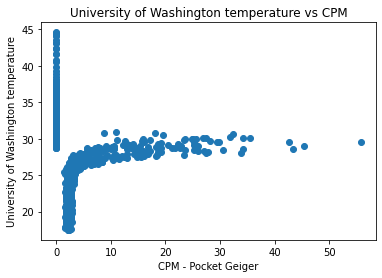

In [49]:
plt.scatter(univWashCPM_binned['cpm'], univWashWeather_binned['temperature'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("University of Washington temperature")
plt.title("University of Washington temperature vs CPM")

In [50]:
r_counts, p_counts = scipy.stats.pearsonr(univWashCPM_binned['cpm'].values, univWashWeather_binned['temperature'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.0001200990000624883
corr. coeff. = 0.010958968932453832, p-value = 0.697092704469603


The correlation is weak with only about 1.1 percent of the random counts being correlated. With the p-value being very high (of 70%), it indicates that there is strong evidence for the null hypothesis and that the results of counts being correlated happened by random.

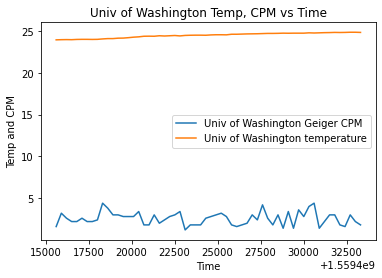

The mean of the University of Washington for the temperature is  24.47083333333332 +/- 4.946800312660025
The standard deviation is  0.2921260667740708


In [142]:
plt.plot(univWashCPM_cut['deviceTime_unix'], univWashCPM_cut['cpm'],label = "Univ of Washington Geiger CPM")
plt.plot(univWashWeather_cut['deviceTime_unix'],univWashWeather_cut['temperature'],label = "Univ of Washington temperature")
plt.ylabel('Temp and CPM')
plt.xlabel('Time')
plt.title("Univ of Washington Temp, CPM vs Time")
plt.legend()
plt.show()
univWashWeatherTemp_mean = np.mean(univWashWeather_cut['temperature'])
univWashWeatherTemp_unc = np.sqrt(univWashWeatherTemp_mean)
univWashWeatherTemp_std_unc = univWashWeatherTemp_unc/ np.sqrt(2* len(univWashWeather_cut['temperature']))
univWashWeatherTemp_std = np.std(univWashWeather_cut['temperature'])
print("The mean of the University of Washington for the temperature is ", univWashWeatherTemp_mean, '+/-', univWashWeatherTemp_unc)
print("The standard deviation is ", univWashWeatherTemp_std)

Text(0.5, 1.0, 'University of Washington humidity vs CPM')

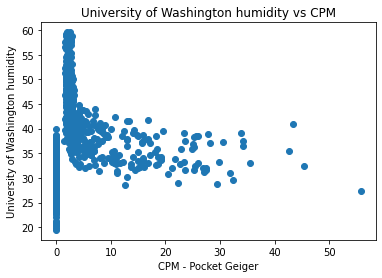

In [51]:
plt.scatter(univWashCPM_binned['cpm'], univWashWeather_binned['humidity'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("University of Washington humidity")
plt.title("University of Washington humidity vs CPM")

In [52]:
r_counts, p_counts = scipy.stats.pearsonr(univWashCPM_binned['cpm'].values, univWashWeather_binned['humidity'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.006199755080057634
corr. coeff. = -0.07873852348156926, p-value = 0.0050951929628828795


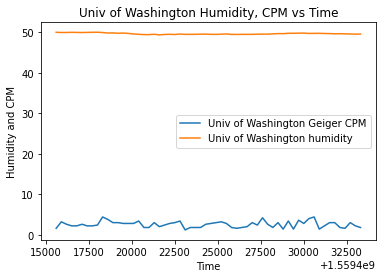

The mean of the University of Washington for humidity is  49.694333333333326 +/- 7.049420779988475
The standard deviation is  0.18066881917536884


In [143]:
plt.plot(univWashCPM_cut['deviceTime_unix'], univWashCPM_cut['cpm'],label = "Univ of Washington Geiger CPM")
plt.plot(univWashWeather_cut['deviceTime_unix'],univWashWeather_cut['humidity'],label = "Univ of Washington humidity")
plt.ylabel('Humidity and CPM')
plt.xlabel('Time')
plt.title("Univ of Washington Humidity, CPM vs Time")
plt.legend()
plt.show()
univWashWeatherHumid_mean = np.mean(univWashWeather_cut['humidity'])
univWashWeatherHumid_unc = np.sqrt(univWashWeatherHumid_mean)
univWashWeatherHumid_std_unc = univWashWeatherHumid_unc/ np.sqrt(2* len(univWashWeather_cut['humidity']))
univWashWeatherHumid_std = np.std(univWashWeather_cut['humidity'])
print("The mean of the University of Washington for humidity is ", univWashWeatherHumid_mean, '+/-', univWashWeatherHumid_unc)
print("The standard deviation is ", univWashWeatherHumid_std)

Text(0.5, 1.0, 'University of Washington pressure vs CPM')

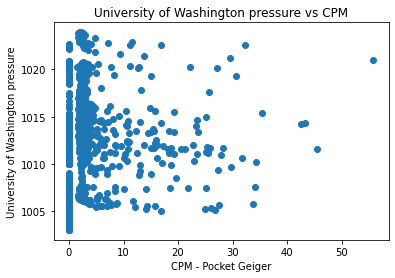

In [53]:
plt.scatter(univWashCPM_binned['cpm'], univWashWeather_binned['pressure'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("University of Washington pressure")
plt.title("University of Washington pressure vs CPM")

In [54]:
r_counts, p_counts = scipy.stats.pearsonr(univWashCPM_binned['cpm'].values, univWashWeather_binned['pressure'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.0001914851695154796
corr. coeff. = -0.013837816645536231, p-value = 0.6230660600741496


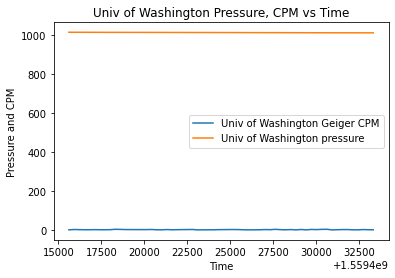

The mean of the University of Washington for pressure is  1013.9973333333334 +/- 31.843324784534254
The standard deviation is  0.8863461826823437


In [145]:
plt.plot(univWashCPM_cut['deviceTime_unix'], univWashCPM_cut['cpm'],label = "Univ of Washington Geiger CPM")
plt.plot(univWashWeather_cut['deviceTime_unix'],univWashWeather_cut['pressure'],label = "Univ of Washington pressure")
plt.ylabel('Pressure and CPM')
plt.xlabel('Time')
plt.title("Univ of Washington Pressure, CPM vs Time")
plt.legend()
plt.show()
univWashWeatherPressure_mean = np.mean(univWashWeather_cut['pressure'])
univWashWeatherPressure_unc = np.sqrt(univWashWeatherPressure_mean)
univWashWeatherPressure_std_unc = univWashWeatherPressure_unc/ np.sqrt(2* len(univWashWeather_cut['pressure']))
univWashWeatherPressure_std = np.std(univWashWeather_cut['pressure'])
print("The mean of the University of Washington for pressure is ", univWashWeatherPressure_mean, '+/-', univWashWeatherPressure_unc)
print("The standard deviation is ", univWashWeatherPressure_std)

In [55]:
rebin = 30
imp.reload(LabMethods)
univWashCPM_binned, univWashAQ_binned = LabMethods.bin_correlation_data(univWashCPM_cut, univWashAQ_cut, rebin)

Text(0.5, 1.0, 'University of Washington PM2.5 vs CPM')

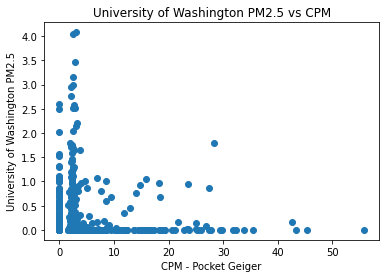

In [56]:
plt.scatter(univWashCPM_binned['cpm'], univWashAQ_binned['PM25'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("University of Washington PM2.5")
plt.title("University of Washington PM2.5 vs CPM")

In [57]:
r_counts, p_counts = scipy.stats.pearsonr(univWashCPM_binned['cpm'].values, univWashAQ_binned['PM25'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.0006202834345947429
corr. coeff. = -0.024905490049279153, p-value = 0.4375145693113574


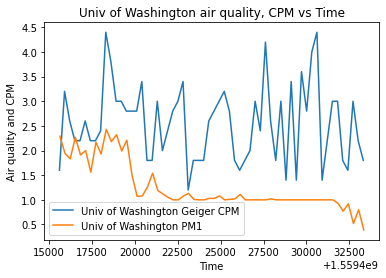

The mean of the University of Washington for air quality for PM1 is  1.2614999999999996 +/- 1.1231651704001506
The standard deviation is  0.485982938658001


In [146]:
plt.plot(univWashCPM_cut['deviceTime_unix'], univWashCPM_cut['cpm'],label = "Univ of Washington Geiger CPM")
plt.plot(univWashAQ_cut['deviceTime_unix'],univWashAQ_cut['PM1'],label = "Univ of Washington PM1")
plt.ylabel('Air quality and CPM')
plt.xlabel('Time')
plt.title("Univ of Washington air quality, CPM vs Time")
plt.legend()
plt.show()
univWashAQ1_mean = np.mean(univWashAQ_cut['PM1'])
univWashAQ1_unc = np.sqrt(univWashAQ1_mean)
univWashAQ1_std_unc = univWashAQ1_unc/ np.sqrt(2* len(univWashAQ_cut['PM1']))
univWashAQ1_std = np.std(univWashAQ_cut['PM1'])
print("The mean of the University of Washington for air quality for PM1 is ", univWashAQ1_mean, '+/-', univWashAQ1_unc)
print("The standard deviation is ", univWashAQ1_std)

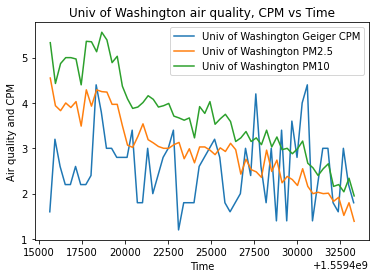

The mean of the University of Washington for air quality for PM2.5 is  2.9673333333333343 +/- 1.7225949417472857
The standard deviation is  0.7571148452440285
The mean of the University of Washington for air quality for PM10 is  3.710333333333333 +/- 1.9262225555042525
The standard deviation is  0.9336790431168279


In [152]:
plt.plot(univWashCPM_cut['deviceTime_unix'], univWashCPM_cut['cpm'],label = "Univ of Washington Geiger CPM")
plt.plot(univWashAQ_cut['deviceTime_unix'],univWashAQ_cut['PM25'],label = "Univ of Washington PM2.5")
plt.plot(univWashAQ_cut['deviceTime_unix'],univWashAQ_cut['PM10'],label = "Univ of Washington PM10")
plt.ylabel('Air quality and CPM')
plt.xlabel('Time')
plt.title("Univ of Washington air quality, CPM vs Time")
plt.legend()
plt.show()
univWashAQ25_mean = np.mean(univWashAQ_cut['PM25'])
univWashAQ25_unc = np.sqrt(univWashAQ25_mean)
univWashAQ25_std_unc = univWashAQ25_unc/ np.sqrt(2* len(univWashAQ_cut['PM25']))
univWashAQ25_std = np.std(univWashAQ_cut['PM25'])
univWashAQ10_mean = np.mean(univWashAQ_cut['PM10'])
univWashAQ10_unc = np.sqrt(univWashAQ10_mean)
univWashAQ10_std_unc = univWashAQ10_unc/ np.sqrt(2* len(univWashAQ_cut['PM10']))
univWashAQ10_std = np.std(univWashAQ_cut['PM10'])
print("The mean of the University of Washington for air quality for PM2.5 is ", univWashAQ25_mean, '+/-', univWashAQ25_unc)
print("The standard deviation is ", univWashAQ25_std)
print("The mean of the University of Washington for air quality for PM10 is ", univWashAQ10_mean, '+/-', univWashAQ10_unc)
print("The standard deviation is ", univWashAQ10_std)

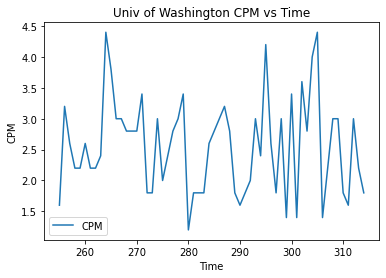

The mean of the University of Washington for radiation for cpm is  2.56 +/- 1.6
The standard deviation is  0.7675067860720624


In [150]:
plt.plot(univWashCPM_cut['cpm'], label = "CPM")
plt.ylabel('CPM')
plt.xlabel('Time')
plt.title('Univ of Washington CPM vs Time')
plt.legend()
plt.show()
univWashCPM_mean = np.mean(univWashCPM_cut['cpm'])
univWashCPM_unc = np.sqrt(univWashCPM_mean)
univWashCPM_std_unc = univWashCPM_unc/ np.sqrt(2* len(univWashCPM_cut['cpm']))
univWashCPM_std = np.std(univWashCPM_cut['cpm'])
print("The mean of the University of Washington for radiation for cpm is ", univWashCPM_mean, '+/-', univWashCPM_unc)
print("The standard deviation is ", univWashCPM_std)

In [58]:
rebin = 30
imp.reload(LabMethods)
univWashCPM_binned, univWashCO2_binned = LabMethods.bin_correlation_data(univWashCPM_cut, univWashCO2_cut, rebin)

Text(0.5, 1.0, 'University of Washington CO2 vs CPM')

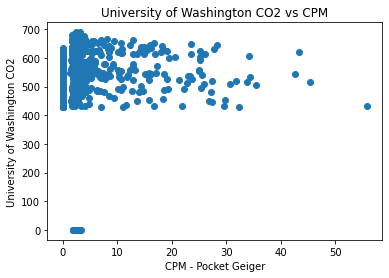

In [59]:
plt.scatter(univWashCPM_binned['cpm'], univWashCO2_binned['co2_ppm'])
plt.xlabel("CPM - Pocket Geiger")
plt.ylabel("University of Washington CO2")
plt.title("University of Washington CO2 vs CPM")

In [60]:
r_counts, p_counts = scipy.stats.pearsonr(univWashCPM_binned['cpm'].values, univWashCO2_binned['co2_ppm'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.00684809950826998
corr. coeff. = 0.08275324469934686, p-value = 0.0032374054346701923


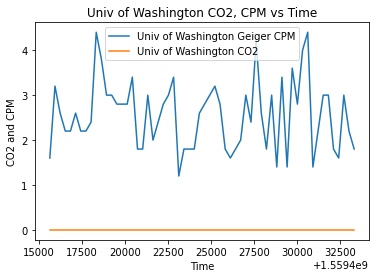

The mean of the University of Washington for CO2 is  0.0 +/- 0.0
The standard deviation is  0.0


In [154]:
plt.plot(univWashCPM_cut['deviceTime_unix'], univWashCPM_cut['cpm'],label = "Univ of Washington Geiger CPM")
plt.plot(univWashCO2_cut['deviceTime_unix'],univWashCO2_cut['co2_ppm'],label = "Univ of Washington CO2")
plt.ylabel('CO2 and CPM')
plt.xlabel('Time')
plt.title("Univ of Washington CO2, CPM vs Time")
plt.legend()
plt.show()
univWashCO2_mean = np.mean(univWashCO2_cut['co2_ppm'])
univWashCO2_unc = np.sqrt(univWashCO2_mean)
univWashCO2_std_unc = univWashCO2_unc/ np.sqrt(2* len(univWashCO2_cut['co2_ppm']))
univWashCO2_std = np.std(univWashCO2_cut['co2_ppm'])
print("The mean of the University of Washington for CO2 is ", univWashCO2_mean, '+/-', univWashCO2_unc)
print("The standard deviation is ", univWashCO2_std)